# King County , WA House Price Analysis and Prediction
***

## Business Problem
***

You are hired by a real estate agency to analize and predict the price of a house in King County, WA area based on a defferent house features.
- This analysis is focused on the house prices for the years 2014 and 2015 housing sales in King County, WA.
- Multiple linear regression models are used to achieve this goal.

## Data 
***
- King County housing 2014-2015 data is collected from [Kaggle](https://www.kaggle.com/code/mosesaborisade/moses-house-sales-in-king-county-usa/data). 

Data Dictionary:

- id: A unique sale id relating to a house sale
- date: Date of house sale
- price: The price which the house sold for
- bedrooms: No of bedrooms house has
- bathrooms: No of bathrooms house has
- sqft_living: Square footage of the house 
- sqft_lot: Square footage of the lot 
- floors: No of floors house has
- waterfront: Whether the house is near/on waterfront. Originally contained ‘YES’ or ‘NO’, converted to 0 or 1 for comparative purposes
- view: Whether the house has a view and whether it’s fair, average, good, or excellent. Converted to numberical (0-4) for comparative purposes
- condition: overall condition of the house: Poor, Fair, Average, Good, Very Good
- grade: Numerical grading for house
- sqft_above: How much of the houses square footage is above ground
- sqft_basement: How much of the square footage is in the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated, if applicable
- zipcode: House zipcode
- lat: House’s latitude coordinate
- long: House’s longitude coordinate
- sqft_living15: Average size of living space for the closest 15 houses
- sqft_lot15: Average size of lot for the closest 15 houses


Import necessary Libraries 
***

In [25]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
## Customization Options
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
plt.style.use('seaborn-talk')
plt.rcParams['figure.facecolor']='white'


Load and inspect the Data 
***

In [26]:
df =pd.read_csv('Data/kc_house_data.csv')

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
df_copy=df.copy()

In [30]:
#df = df.set_index('id')

Statistical summary of numeric and non-numeric columns
***

In [31]:
# Numeric columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000","21,613.0000"
mean,"4,580,301,520.8650","540,088.1418",3.3708,2.1148,"2,079.8997","15,106.9676",1.4943,0.0075,0.2343,3.4094,7.6569,"1,788.3907",291.5090,"1,971.0051",84.4023,"98,077.9398",47.5601,-122.2139,"1,986.5525","12,768.4557"
std,"2,876,565,571.3121","367,127.1965",0.9301,0.7702,918.4409,"41,420.5115",0.5400,0.0865,0.7663,0.6507,1.1755,828.0910,442.5750,29.3734,401.6792,53.5050,0.1386,0.1408,685.3913,"27,304.1796"
min,"1,000,102.0000","75,000.0000",0.0000,0.0000,290.0000,520.0000,1.0000,0.0000,0.0000,1.0000,1.0000,290.0000,0.0000,"1,900.0000",0.0000,"98,001.0000",47.1559,-122.5190,399.0000,651.0000
25%,"2,123,049,194.0000","321,950.0000",3.0000,1.7500,"1,427.0000","5,040.0000",1.0000,0.0000,0.0000,3.0000,7.0000,"1,190.0000",0.0000,"1,951.0000",0.0000,"98,033.0000",47.4710,-122.3280,"1,490.0000","5,100.0000"
50%,"3,904,930,410.0000","450,000.0000",3.0000,2.2500,"1,910.0000","7,618.0000",1.5000,0.0000,0.0000,3.0000,7.0000,"1,560.0000",0.0000,"1,975.0000",0.0000,"98,065.0000",47.5718,-122.2300,"1,840.0000","7,620.0000"
75%,"7,308,900,445.0000","645,000.0000",4.0000,2.5000,"2,550.0000","10,688.0000",2.0000,0.0000,0.0000,4.0000,8.0000,"2,210.0000",560.0000,"1,997.0000",0.0000,"98,118.0000",47.6780,-122.1250,"2,360.0000","10,083.0000"
max,"9,900,000,190.0000","7,700,000.0000",33.0000,8.0000,"13,540.0000","1,651,359.0000",3.5000,1.0000,4.0000,5.0000,13.0000,"9,410.0000","4,820.0000","2,015.0000","2,015.0000","98,199.0000",47.7776,-121.3150,"6,210.0000","871,200.0000"


In [32]:
# Non-Numeric columns
df.describe(exclude='number')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [33]:
# check for missing/null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values in the dataset

In [34]:
# Check for duplicates
df.duplicated().sum()

0

Histogram for Price


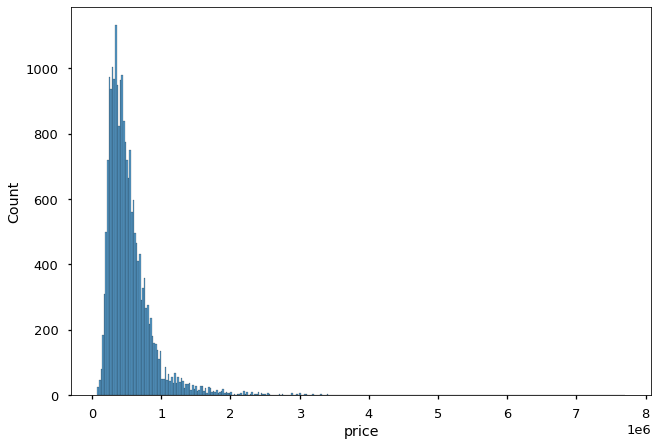

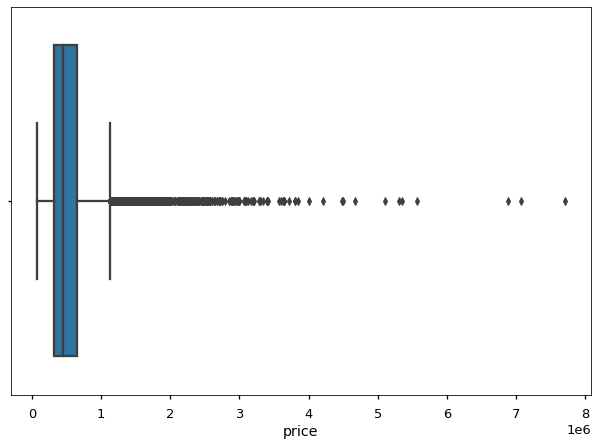

In [35]:
# check for outliers

print('Histogram for Price')

sns.histplot(data=df,x='price')
plt.show()
sns.boxplot(data=df,x='price')
plt.show()

In [36]:
# Converting date(object) format  to date format
df['date'] = pd.to_datetime(df['date'])

In [37]:
df['date'].value_counts()

2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64

In [38]:
## FILTERING EXTREME VALUES FOR DEMONSTRATION PURPOSES
df = df.loc[( df['bedrooms'] <8) & (df['price'] < 2_000_000) & df['bathrooms']>0]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,2014-12-09,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,2015-02-25,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,2014-12-09,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,2015-02-18,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,"360,000.0000",3,2.5000,1530,1131,3.0000,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,6600060120,2015-02-23,"400,000.0000",4,2.5000,2310,5813,2.0000,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,1523300141,2014-06-23,"402,101.0000",2,0.7500,1020,1350,2.0000,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,291310100,2015-01-16,"400,000.0000",3,2.5000,1600,2388,2.0000,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


<AxesSubplot:xlabel='price'>

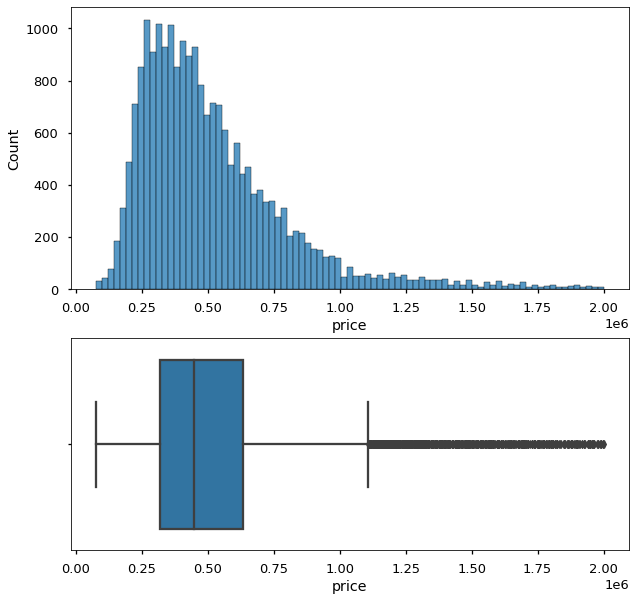

In [39]:
grid_spec = {'height_ratios':[1.2,0.9]}
fig, axes = plt.subplots(nrows=2, figsize=(10,10), gridspec_kw=grid_spec)
sns.histplot(data=df, x='price',ax=axes[0])
sns.boxplot(data=df, x='price',ax=axes[1])

In [40]:
import scipy.stats as stats
idx_outliers = np.abs(stats.zscore(df['price']) )>3
idx_outliers.sum()

463

In [41]:
# saving data without outlier

df = df[~idx_outliers].copy()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,2014-12-09,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,2015-02-25,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,2014-12-09,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,2015-02-18,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,"360,000.0000",3,2.5000,1530,1131,3.0000,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,6600060120,2015-02-23,"400,000.0000",4,2.5000,2310,5813,2.0000,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,1523300141,2014-06-23,"402,101.0000",2,0.7500,1020,1350,2.0000,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,291310100,2015-01-16,"400,000.0000",3,2.5000,1600,2388,2.0000,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


In [42]:
# Date feature engineering 
df['datetime'] = pd.to_datetime(df['date'])
df['Month_name'] =  df['datetime'].dt.month_name() 
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year

#df = df.set_index('id')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,datetime,Month_name,Month,Year
0,7129300520,2014-10-13,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,...,0,98178,47.5112,-122.2570,1340,5650,2014-10-13,October,10,2014
1,6414100192,2014-12-09,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,...,1991,98125,47.7210,-122.3190,1690,7639,2014-12-09,December,12,2014
2,5631500400,2015-02-25,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,...,0,98028,47.7379,-122.2330,2720,8062,2015-02-25,February,2,2015
3,2487200875,2014-12-09,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,...,0,98136,47.5208,-122.3930,1360,5000,2014-12-09,December,12,2014
4,1954400510,2015-02-18,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,...,0,98074,47.6168,-122.0450,1800,7503,2015-02-18,February,2,2015


## Exploratory Data Analysis
***

**Lets visualize our House Price distribution**

Feature vs Tartget relationship
***
- We want to determine how features of a home influence its sale price.
- Specifically, we will be using:
    - `sqft_living`:Square-Footage of all Living Areas
    - `bedrooms`: # of Bedrooms
    - '`bathrooms`: # of Bathrooms

In [43]:
from matplotlib import ticker
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-6:,.1f}M"

# Create the formatter
price_fmt_mill =ticker.FuncFormatter(millions)

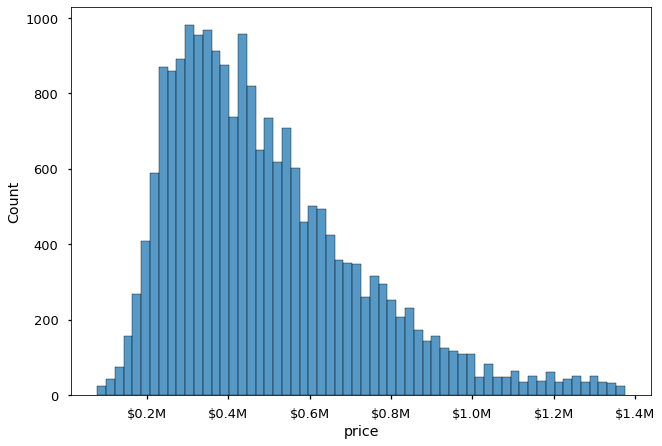

In [45]:
ax = sns.histplot(data=df, x='price')
ax.xaxis.set_major_formatter(price_fmt_mill)

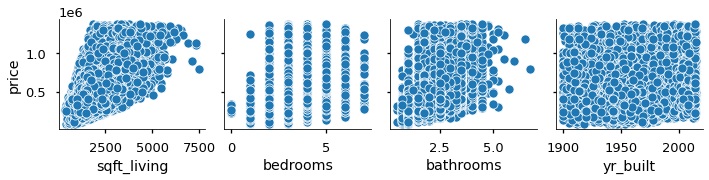

In [47]:
## Plot only sqft_living, bedroom, bathroom ,year_build using pair plot with target price
import seaborn as sns
plot_cols=['sqft_living','bedrooms','bathrooms','yr_built']
sns.pairplot(data=df, y_vars='price',x_vars=plot_cols)

In [100]:
# NOTE: if we had more time, we would write this together.
def plot_feature_vs_target(df,x='sqft_living',y='price',price_format=True):
    """Plots a seaborn regplot of x vs y."""
    ax = sns.regplot(data=df,x=x,y=y,
                line_kws=dict(color='k',ls='--',lw=2),
               scatter_kws=dict(s=50,edgecolor='white',lw=1,alpha=0.8)
                    )
    
    ax.get_figure().set_size_inches(10,6)
    ax.set_title(f'{x} vs {y}')
    ax.get_figure().set_facecolor('white')
    
    if price_format:
        ## Formatting Price Axis
        price_fmt = StrMethodFormatter("${x:,.0f}")
        ax.yaxis.set_major_formatter(price_fmt)
    return ax

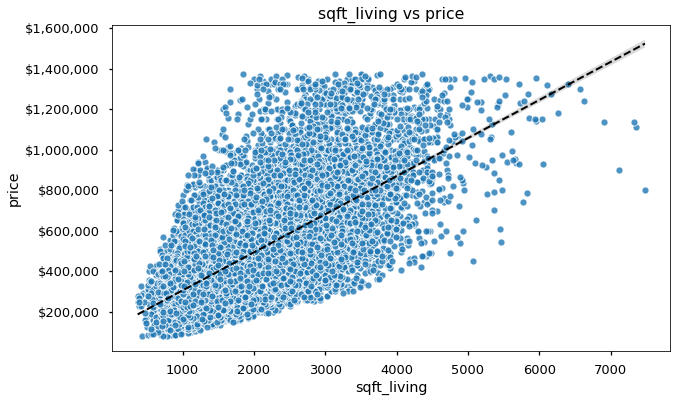

In [101]:
## Visualize the relationship between sqft_living and price
ax = plot_feature_vs_target(df,x='sqft_living');

### What Our Trendline Tells Us
- Our trendline summarizes the relationship between our feature and our target.
- It is comprised of the: <br>
1) y-intercept (AKA $c$ or $b$ or $\beta_{0}$) indicating the default value of y when X=0.<br>
2) and a slope (AKA $m$ or $\beta$) indicating the relationship between X and y. When X increases by 1, y increases by $m$.

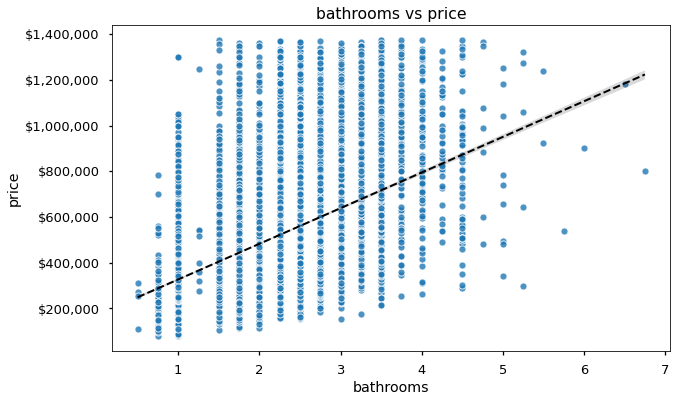

In [102]:
## Visualize the relationship between bathrooms and price
plot_feature_vs_target(df,x='bathrooms');

<AxesSubplot:title={'center':'bedrooms vs price'}, xlabel='bedrooms', ylabel='price'>

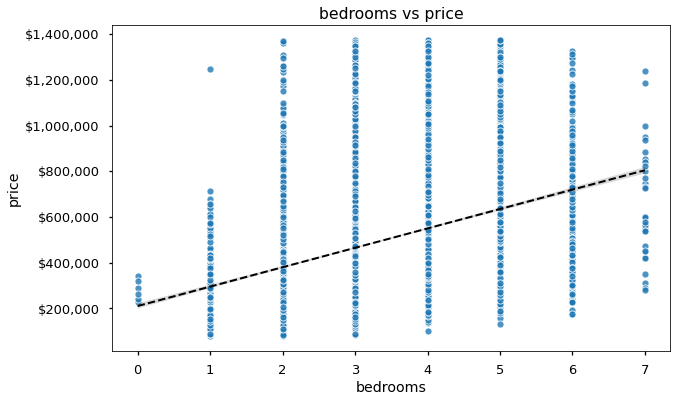

In [103]:
## Visualize the relationship between bedrooms and price
plot_feature_vs_target(df,x='bedrooms')

<AxesSubplot:title={'center':'waterfront vs price'}, xlabel='waterfront', ylabel='price'>

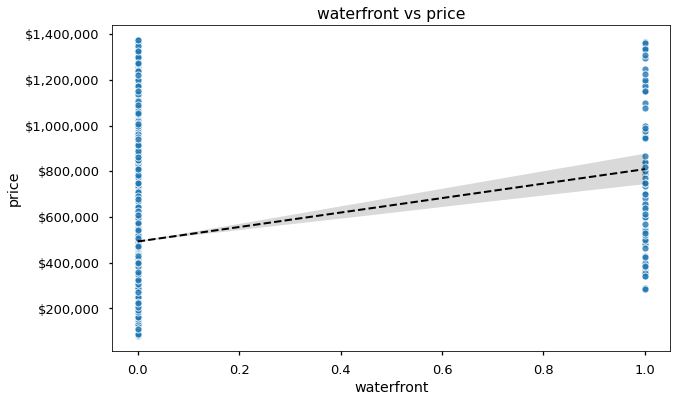

In [104]:
## Visualize the relationship between waterfront and price
plot_feature_vs_target(df,x='waterfront')

In [105]:

# fig, ax = plt.subplots(figsize=(17,17)) 
# corrs = df.corr()
# mask = np.zeros_like(corrs)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corrs, square=True, vmin=-.4, vmax=.4,annot =True)
# plt.title('Correlation matrix')

<AxesSubplot:title={'center':'yr_built vs price'}, xlabel='yr_built', ylabel='price'>

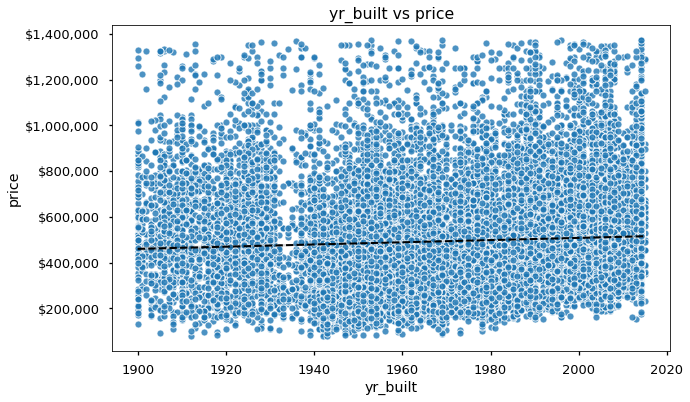

In [106]:
## Visualize the relationship between grade and price
plot_feature_vs_target(df,x='yr_built')

In [92]:
df['floors'].value_counts().to_frame()

,floors
1.0000,10632
2.0000,8093
1.5000,1897
3.0000,607
2.5000,141
3.5000,6


<AxesSubplot:xlabel='waterfront', ylabel='price'>

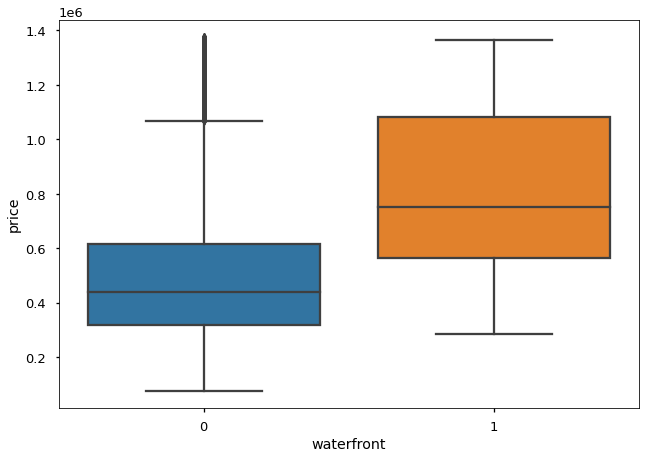

In [98]:
sns.boxplot(x="waterfront", y="price", data=df)

In [49]:
## make ourn final map and save as varaible
import plotly.express as px
pfig = px.scatter_mapbox(df, lat='lat',lon='long', 
                  mapbox_style='open-street-map',
                 color='price',
                        title='King County houses , WA')


pfig.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20913 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20913 non-null  int64         
 1   date           20913 non-null  datetime64[ns]
 2   price          20913 non-null  float64       
 3   bedrooms       20913 non-null  int64         
 4   bathrooms      20913 non-null  float64       
 5   sqft_living    20913 non-null  int64         
 6   sqft_lot       20913 non-null  int64         
 7   floors         20913 non-null  float64       
 8   waterfront     20913 non-null  int64         
 9   view           20913 non-null  int64         
 10  condition      20913 non-null  int64         
 11  grade          20913 non-null  int64         
 12  sqft_above     20913 non-null  int64         
 13  sqft_basement  20913 non-null  int64         
 14  yr_built       20913 non-null  int64         
 15  yr_renovated   2091

## Modeling using 3 features 'bedrooms','bathrooms','sqft_living'

In [51]:
# Create our X & y using bedrooms,bathrooms, sqft-living, yr_built
use_3cols = ['bedrooms','bathrooms','sqft_living']
#"sqft_above","grade","sqft_living"] 
X = df[use_3cols].copy()
y = df['price'].copy()

## Train test split (random-state 321, test_size=0.25)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=321)
X_train

,bedrooms,bathrooms,sqft_living
1652,2,1.0000,1200
20747,2,1.5000,1084
5215,3,2.7500,1990
14075,3,2.5000,1620
249,3,1.7500,1560
...,...,...,...
12347,4,2.5000,1770
6113,3,1.5000,1470
11374,3,2.5000,2577
4356,3,1.5000,1660


In [53]:
 from matplotlib.ticker import StrMethodFormatter
# ## Plot a scatter plot of sqft-living vs price
# ax = sns.scatterplot(data=df,x='sqft_living',y='price',s=50)
# ax.set_title('Relationship Between Square Footage and House Price')

# ## Formatting Price Axis
# price_fmt = StrMethodFormatter("${x:,.0f}")
# ax.yaxis.set_major_formatter(price_fmt)
# ax.get_figure().set_size_inches(10,6)

In [54]:
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
        
        ## get the value to annotate
        val = bar.get_width()

        if val<0:
            x=0
        else:
            x=val


        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2

        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:,.2f}", (x,bar_ax),ha=ha,va=va,size=size,
                    xytext=xytext, textcoords=textcoords)

In [55]:
def plot_coefficients(coeffs, figsize=(6,5), title='Regression Coefficients',
                      intercept=True, intercept_name='Intercept',
                      sort_values=True, ascending=True, 
                      ):
    ## Exclude intercept if intercept==False
    if intercept==False:
        if intercept_name in coeffs:
            coeffs = coeffs.drop(intercept_name).copy()
    
    ## Sort values
    if sort_values:
        ceoffs = coeffs.sort_values(ascending=ascending)
 
    ## Plot
    ax = ceoffs.plot(kind='barh',figsize=figsize)
    
    ## Customize Viz 
    ax.axvline(0,color='k', lw=1)
    ax.set(ylabel='Feature Name',xlabel='Coefficient',title=title)
    return ax


#ax = plot_coefficients(coeffs, intercept=False)

In [56]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
    print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [57]:
reg = LinearRegression()
reg.fit(X_train,y_train)
evaluate_regression(reg, X_train, y_train, X_test, y_test)

Training Data:	R^2 = 0.43	RMSE = 178,452.79	MAE = 138,453.63
Test Data:	R^2 = 0.44	RMSE = 177,104.24	MAE = 136,839.84



    - Our model can explain 44% of the variance of house price using just 5 features!

Lets find Coefficients using our model

In [58]:
reg.coef_

array([-30049.14218598,  11776.67978366,    198.6927096 ])

In [59]:

reg.intercept_

170535.14114071964

In [60]:
## Lets define our function to get the coefficients  
def get_coeffs(reg,X_train):
    """Extracts the coefficients from a scikit-learn LinearRegression or LogisticRegression"""
    coeffs = pd.Series(reg.coef_.flatten(),index=X_train.columns)

    coeffs.loc['Intercept'] = reg.intercept_

    return coeffs

- Linear Regression Equation
$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n  $$
which we can simplify to:
$$ \hat y =  \sum_{i=0}^{N} \beta_i x_i  $$

In [61]:
## Get the coefficents from the model using our custom 
coeffs = get_coeffs(reg,X_train)
coeffs

bedrooms      -30,049.1422
bathrooms      11,776.6798
sqft_living       198.6927
Intercept     170,535.1411
dtype: float64

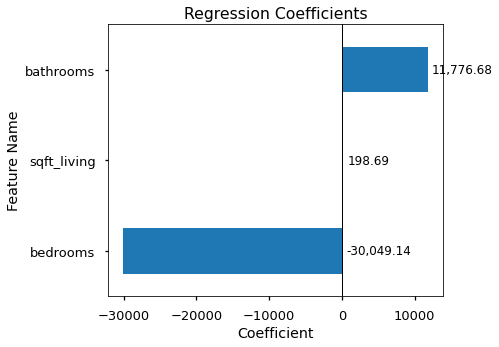

In [62]:
ax = plot_coefficients(coeffs,intercept =False)
annotate_hbars(ax)

>- **Each coefficient tells us the effect of increasing the values in that column by 1 unit.** 
>- According to our model, we can determine a home's price using the following results:
    - The model assumed a default/starting house price was \$170,535.1411 (the intercept)
    - For each additional bedrooms, subtract      \$-30,049.1422
    - For each batrhoom, add \$11,776.6798
    - For each square foot of living space, add \$198.6927

In [79]:
## Let's select an example house and see how we calculate price
i = 17188

house = X_test.loc[i]
house

bedrooms          4.0000
bathrooms         2.2500
sqft_living   2,140.0000
Name: 17188, dtype: float64

In [80]:
## Calculate the home's predicted price using our coefficients
price = house['bedrooms']*coeffs['bedrooms'] + \
        house['bathrooms']*coeffs['bathrooms'] + \
        house['sqft_living']*coeffs['sqft_living'] + coeffs['Intercept']
        #house['yr_built']*coeffs['yr_built']+ coeffs['Intercept']

print(f"${price:,.2f}")

$502,038.50


In [81]:
coeffs.values

array([-30049.14218598,  11776.67978366,    198.6927096 , 170535.14114072])

In [82]:
## What would our model predict for our test house?
reg.predict(house.values.reshape(1,-1))

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([502038.50044918])

In [83]:
y_test.loc[i]

502000.0

In [84]:
ypred = reg.predict(X_test)
res = abs(ypred- y_test)
res

14364   113,669.9682
4174     18,483.1063
6489     88,254.6313
17003    42,703.5799
17103   292,763.7409
            ...     
3593    197,404.5418
19299   135,826.3749
20122   113,092.2286
11332   495,935.4280
10642   391,508.9373
Name: price, Length: 5229, dtype: float64

In [78]:
res.idxmin()

17188